# Pandas Applications - Bussines Data Analysis

In [440]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

## Se obtiene un DataFrame a partir de los archivos CSV mensuales

In [442]:
# Obtener datos de los archivos de texto (CSV)
import os

df = pd.DataFrame()

for item in os.listdir(".//csv_data"):
    file_ext = item.split(".")[-1]
    if file_ext == 'csv':
        # print(item)
        df_csv = pd.read_csv(f".//csv_data//{item}", skip_blank_lines=True)
        df = pd.concat([df, df_csv])
        

## Se limpian los datos (duplicados, NaN, etc) para su posterior análisis

In [443]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.sort_values('Order Date', inplace=True)
df.drop(index=519, inplace=True)

In [444]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
8507,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"
...,...,...,...,...,...,...
1914,297481,AA Batteries (4-pack),1,3.84,12/31/19 23:42,"82 Hill St, Dallas, TX 75001"
2870,298406,AAA Batteries (4-pack),2,2.99,12/31/19 23:42,"30 Elm St, San Francisco, CA 94016"
22387,317048,AAA Batteries (4-pack),2,2.99,12/31/19 23:45,"743 Adams St, San Francisco, CA 94016"
14778,309773,AAA Batteries (4-pack),1,2.99,12/31/19 23:52,"60 Hickory St, Los Angeles, CA 90001"


In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185675 entries, 6344 to 2117
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185675 non-null  object
 1   Product           185675 non-null  object
 2   Quantity Ordered  185675 non-null  object
 3   Price Each        185675 non-null  object
 4   Order Date        185675 non-null  object
 5   Purchase Address  185675 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [446]:
#df['Quantity Ordered'] = df['Quantity Ordered'].apply(lambda x: int(x))
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

In [447]:
#df['Price Each'] = df['Price Each'].apply(lambda x: float(x))
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [448]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%y %H:%M")

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185675 entries, 6344 to 2117
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185675 non-null  object        
 1   Product           185675 non-null  object        
 2   Quantity Ordered  185675 non-null  int64         
 3   Price Each        185675 non-null  float64       
 4   Order Date        185675 non-null  datetime64[ns]
 5   Purchase Address  185675 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


## Caso 1: ¿Cuál fue el mejor mes en ventas? ¿Cuánto se facturo en dicho mes?

In [450]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [451]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",11.99
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",11.95
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",150.00
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2.99
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",23.90
...,...,...,...,...,...,...,...
1914,297481,AA Batteries (4-pack),1,3.84,2019-12-31 23:42:00,"82 Hill St, Dallas, TX 75001",3.84
2870,298406,AAA Batteries (4-pack),2,2.99,2019-12-31 23:42:00,"30 Elm St, San Francisco, CA 94016",5.98
22387,317048,AAA Batteries (4-pack),2,2.99,2019-12-31 23:45:00,"743 Adams St, San Francisco, CA 94016",5.98
14778,309773,AAA Batteries (4-pack),1,2.99,2019-12-31 23:52:00,"60 Hickory St, Los Angeles, CA 90001",2.99


In [452]:
df_mes = df.groupby(by=df['Order Date'].dt.month).sum()     # dt:Acceso a las funciones de datetime (accessor)
df_mes

,Quantity Ordered,Price Each,Sales
Order Date,,,
1,10892,1.810825e+06,1.821313e+06
2,13430,2.186937e+06,2.200075e+06
3,16978,2.789081e+06,2.804970e+06
4,20536,3.366219e+06,3.389218e+06
5,18652,3.133025e+06,3.150506e+06
6,15233,2.560492e+06,2.576268e+06
7,16053,2.631075e+06,2.646311e+06
8,13428,2.226952e+06,2.241071e+06
9,13090,2.081886e+06,2.094454e+06


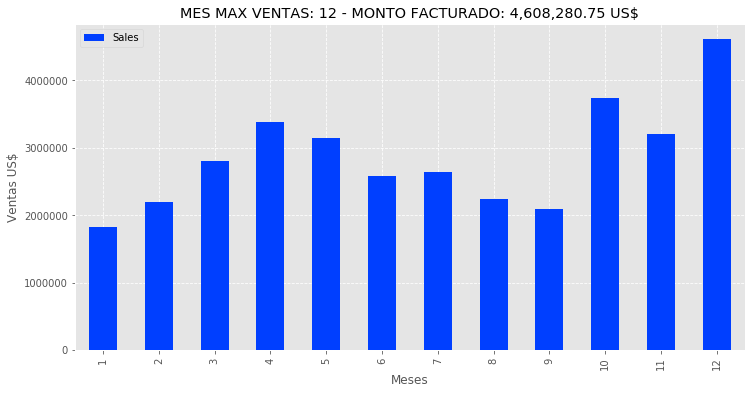

In [454]:
title = f"MES MAX VENTAS: {df_mes.iloc[df_mes['Sales'].argmax()].name} - MONTO FACTURADO: {df_mes['Sales'].max():,.2f} US$"
df_mes.plot.bar(y='Sales', figsize=(12, 6))
plt.title(title)
plt.xlabel('Meses')
plt.ylabel('Ventas US$')
plt.grid(linestyle='dashed')
plt.show()

## ¿Qué ciudad tuvo las mejores ventas?

In [455]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(",")[1])

In [456]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",11.99,New York City
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",11.95,San Francisco
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",150.00,New York City
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2.99,Dallas
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",23.90,Atlanta
...,...,...,...,...,...,...,...,...
1914,297481,AA Batteries (4-pack),1,3.84,2019-12-31 23:42:00,"82 Hill St, Dallas, TX 75001",3.84,Dallas
2870,298406,AAA Batteries (4-pack),2,2.99,2019-12-31 23:42:00,"30 Elm St, San Francisco, CA 94016",5.98,San Francisco
22387,317048,AAA Batteries (4-pack),2,2.99,2019-12-31 23:45:00,"743 Adams St, San Francisco, CA 94016",5.98,San Francisco
14778,309773,AAA Batteries (4-pack),1,2.99,2019-12-31 23:52:00,"60 Hickory St, Los Angeles, CA 90001",2.99,Los Angeles


In [457]:
df_city_sales = df.groupby(by=['City']).sum()[['Sales']]
df_city_sales

,Sales
City,
Atlanta,2.794195e+06
Austin,1.818029e+06
Boston,3.657928e+06
Dallas,2.765374e+06
Los Angeles,5.448280e+06
New York City,4.661714e+06
Portland,2.319332e+06
San Francisco,8.254610e+06
Seattle,2.745046e+06


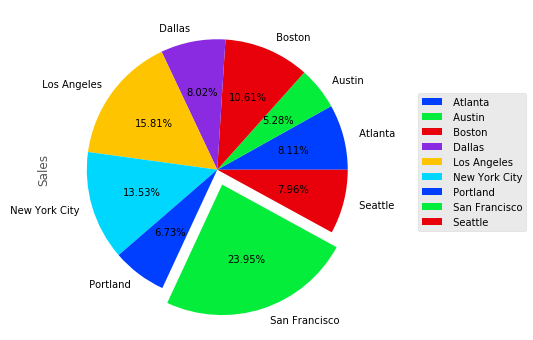

In [491]:
explode = df_city_sales['Sales'] == df_city_sales.max().values[0]
explode = explode.values * 0.12

df_city_sales.plot.pie(y='Sales', autopct="%.2f%%", figsize=(8, 6), explode=explode)
plt.legend(bbox_to_anchor=(1.1, 0.75))
plt.show()

## ¿A qué hora se debería programar la campaña publicitaria para maximizar las ventas?

## ¿Existen productos que se vendan con mayor frecuencia junto a otros?

## ¿Qué producto tiene mejores ventas? Proponga algun argumento que sustente el resultado